In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

In [3]:
df = pd.read_stata("/Users/gjmb/Desktop/Python/data/gss2018python.dta")

/Users/gjmb/anaconda3/lib/python3.9/site-packages/pandas/io/stata.py:1514: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  warnings.warn(msg, UnicodeWarning)


In [4]:
df = df.sort_values(by=["paeduc", "educ"]) # we sort by 

In [5]:
df = df.dropna(subset=['paeduc', 'educ'])

In [6]:
xs, ys = np.meshgrid(df["paeduc"], df["educ"])

In [42]:
def f(x, y):
    return np.where(xs == ys, 1, 0)
z = f(xs, ys)
print(z.shape)

(1687, 1687)


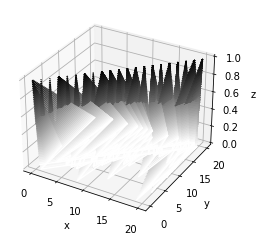

In [44]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(xs, ys, z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
df = pd.read_stata("/Users/gjmb/Desktop/Python/data/gss2018python.dta")
df = df.dropna(subset=["paeduc", "educ"])
x = np.arange(0, 21)
y = np.arange(0, 21)
xs, ys = np.meshgrid(x, y)
print(xs.shape)

/Users/gjmb/anaconda3/lib/python3.9/site-packages/pandas/io/stata.py:1514: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  warnings.warn(msg, UnicodeWarning)


(21, 21)


In [41]:
xprime = np.arange(0, 22)
yprime = np.arange(0, 22)
H, xedges, yedges = np.histogram2d(df['paeduc'], df['educ'], bins=(xprime, yprime))
print(H.shape)
H = (H/1687)*100

(21, 21)


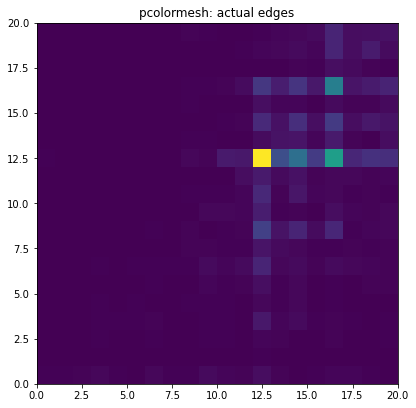

In [14]:
fig = plt.figure(figsize=(22, 22))
ax = fig.add_subplot(132, title='pcolormesh: actual edges',
        aspect='equal')
X, Y = np.meshgrid(xedges, yedges)
ax.pcolormesh(X, Y, H)

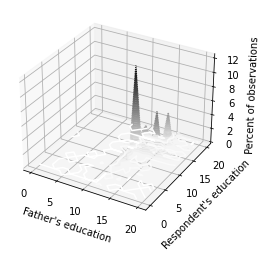

In [46]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(xs, ys, H, 50, cmap='binary')
ax.set_xlabel("Father's education")
ax.set_ylabel("Respondent's education")
ax.set_zlabel('Percent of observations');

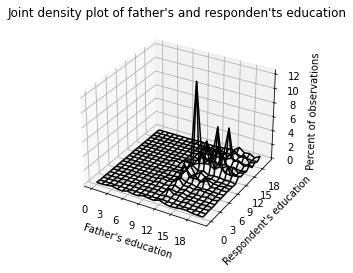

In [54]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(xs, ys, H, color='black')
ax.set_title("Joint density plot of father's and responden'ts education")
ax.set_xlabel("Father's education")
ax.set_ylabel("Respondent's education")
ax.set_zlabel('Percent of observations')
ax.set_xticks(np.arange(0, 21, 3))
ax.set_yticks(np.arange(0, 21, 3));

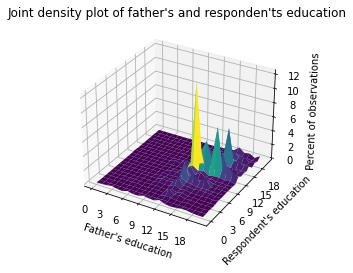

In [56]:
ax = plt.axes(projection='3d')
ax.plot_surface(xs, ys, H, rstride=1, cstride=1,
cmap='viridis', edgecolor='none')
ax.set_title("Joint density plot of father's and responden'ts education")
ax.set_xlabel("Father's education")
ax.set_ylabel("Respondent's education")
ax.set_zlabel('Percent of observations')
ax.set_xticks(np.arange(0, 21, 3))
ax.set_yticks(np.arange(0, 21, 3));